# MA2007B: Uso de Geometría y Topología para la Ciencia de Datos
## Tec de Monterrey, Campus Monterrey

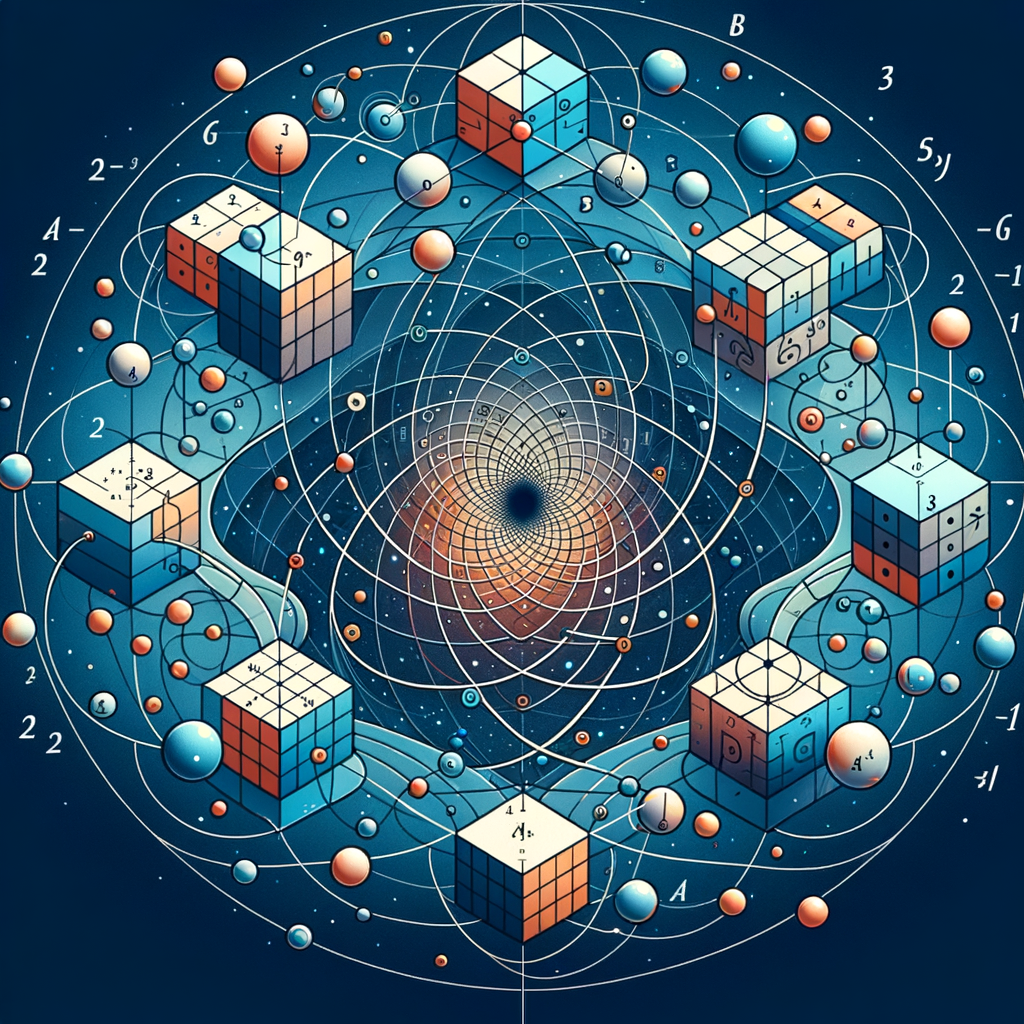

## Profesores 

- (Reto) Dr. Lilia Alanís López (lilia.alanislpz@tec.mx)
- (Módulos) Dr. Alejandro Ucan Puc (alejandro.ucan-puc@tec.mx)

## Socio Formador

- SLB México (https://www.slb.com/)
- Gisel Solis Bonilla

# ¿Cuál es la diferencia entre los siguientes datos?



In [45]:
from data.generate_datasets import make_gravitational_waves
from pathlib import Path

#R = 0.9999
R = 0.5
n_signals = 1
DATA = Path("./data")

noisy_signals, gw_signals, labels = make_gravitational_waves(
    path_to_data=DATA, n_signals=n_signals, r_min=R, r_max=R, n_snr_values=1
)

print(f"Number of noisy signals: {len(noisy_signals)}")
print(f"Number of timesteps per series: {len(noisy_signals[0])}")

Number of noisy signals: 1
Number of timesteps per series: 8692


In [46]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# get the index corresponding to the first pure noise time series
background_idx = np.argmin(labels)
# get the index corresponding to the first noise + gravitational wave time series
signal_idx = np.argmax(labels)

ts_noise = noisy_signals[background_idx]
ts_background = noisy_signals[signal_idx]
ts_signal = gw_signals[signal_idx]

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=list(range(len(ts_noise))), y=ts_noise, mode="lines", name="noise"),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=list(range(len(ts_background))),
        y=ts_background,
        mode="lines",
        name="background",
    ),
    row=1,
    col=2,
)

fig.add_trace(
    go.Scatter(x=list(range(len(ts_signal))), y=ts_signal, mode="lines", name="signal"),
    row=1,
    col=2,
)
fig.show()

In [59]:
from gtda.time_series import SingleTakensEmbedding
embedding_dimension = 3
embedding_time_delay = 30
stride = 5

embedder = SingleTakensEmbedding(
    time_delay=embedding_time_delay, dimension=embedding_dimension, stride=stride
)

y_gw_embedded = embedder.fit_transform(gw_signals[0])

In [60]:
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud
plot_point_cloud(y_gw_embedded)

In [61]:
y_gw_embedded = embedder.fit_transform(noisy_signals[0])

In [62]:
plot_point_cloud(y_gw_embedded)

# ¿Qué es __Topological Data Analysis (TDA)__?

> Sabemos que los datos, por más complejos que sean o que se encuentren en dimensiones altas, cuentan con una _forma (geometría/topología)_ intrínseca, y entender esta forma nos ayuda a determinar el proceso más adecuado para trabajar con ellos.

## Un poco de historia

El TDA comenzó a principios de los años 2000's con los trabajos pioneros de:

  * [Edelsbrunner et. al. (2002)](https://link.springer.com/article/10.1007/s00454-002-2885-2) <br/><br/>
  * [Zomorodian and Carlsson (2005)](https://link.springer.com/article/10.1007/s00454-004-1146-y)
  
con trabajos relacionados con __homología persistente__ (temá clave que veremos más adelante).


> El TDA proporciona métodos matemáticos, estadísticos y algorítmicos para analizar y explotar propiedades topológicas-geométricas de un data set (nubes de puntos en el espacio euclideano o espacios más generales.)

 ## Axiomas del TDA

1. Asumimos que nuestro dataset es finito, y que siempre se puede asociar con una noción de distancia entre los puntos (distancia de espacio métrico o matriz de distancias). <br/><br/>

1. Siempre podemos construir un objeto "continuo" asociado al dataset (complejo simplicial o filtración). <br/><br/>

1. La información topológica de nuestro dataset proviene del objeto continuo (triangulaciones, homología). <br/><br/>

1. Con la información topológica podemos proveer nuevas propiedades (topológicas o geométricas) del dataset (visualización).


# ¿Qué es _forma_?

> Entendemos por _forma_ a la estructura de un objeto/espacio. <br/><br/>
La __topología__ es la rama de las mátematicas que estudia las propiedas intrínsecas de una espacio (_espacios topológicos_) que son preservadas bajo ciertas transformaciones (_homeomorfismos_).

![Cube and Sphere](cube_sphere.png)]